In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from os import path
import itertools
from scipy import stats
from tqdm.notebook import tqdm

In [2]:
sns.set_style('ticks')

### Inputs

In [3]:
logTPM_file = path.join('..','data','raw_data','log2expset.csv') # Enter log2expset filename here
metadata_file = path.join('..','data','raw_data','matadata_all.csv') # Enter metadata filename here

## Load expression data

In [4]:
DF_log_tpm = pd.read_csv(logTPM_file,index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 8214
Number of samples: 305


,GSM94778,GSM94780,GSM94781,GSM94783,GSM94784,GSM94785,GSM94787,GSM94788,GSM94790,GSM212687,...,GSM3747634,GSM3747635,GSM3747636,GSM3747637,GSM5858212,GSM5858213,GSM5858214,GSM5858215,GSM5858216,GSM5858217
GeneID,,,,,,,,,,,,,,,,,,,,,
bll0005,8.846117,8.900867,8.613237,8.872521,8.797337,8.689998,8.520815,7.934281,8.060696,2.765535,...,5.055170,7.087293,3.976620,5.478454,1.168315,2.761417,3.245076,2.612862,4.743693,2.496306
bll0006,10.899281,10.258684,10.834708,10.690696,11.148921,11.164404,9.940607,9.759555,9.373735,4.510962,...,3.827799,5.954929,3.960864,5.486074,1.326261,3.104929,2.975597,6.299840,2.805325,3.100185
bll0007,10.968451,10.317865,10.616457,10.762631,11.086335,10.915655,10.339739,9.942221,9.915730,4.523562,...,5.184871,6.964491,4.554847,5.202171,5.826477,4.844175,4.936713,3.668471,5.643928,3.756351
bll0008,7.049849,7.628628,7.472488,7.561479,7.921841,7.575161,7.443772,7.940167,7.593204,3.405992,...,2.144999,3.996542,4.940298,5.423672,2.590923,3.790282,1.239343,4.486058,2.334871,2.387465
bll0009,9.133142,8.937521,8.553053,9.231461,9.010948,9.010108,8.135966,8.475328,7.745506,4.472488,...,6.149786,3.862947,4.424875,3.588912,1.160720,5.962387,4.573780,5.912207,4.574949,5.629969


### Load metadata

In [5]:
DF_metadata = pd.read_csv(metadata_file,index_col=0)
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 316


,title,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,growth_protocol_ch1,...,characteristics_ch1.4,genotype/variation:ch1,phase:ch1,treatment:ch1,host plant:ch1,infected with:ch1,time point:ch1,tissue:ch1,contact_web_link,Induction time:ch1
GSM94778,"Bradyrhizobium japonicum strain LO, low iron, ...",Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,RNA,1,Cells,Bradyrhizobium japonicum,Parent strain LO grown in low iron media,Grown in 0.5 GSY media with no added iron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM94780,"Bradyrhizobium japonicum strain LO, low iron, ...",Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,RNA,1,Cells,Bradyrhizobium japonicum,Parent strain LO grown in low iron media,Grown in 0.5 GSY media with no added iron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM94781,"Bradyrhizobium japonicum strain LO, low iron, ...",Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,RNA,1,Cells,Bradyrhizobium japonicum,Parent strain LO grown in low iron media,Grown in 0.5 GSY media with no added iron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM94783,"Bradyrhizobium japonicum strain LO, high iron,...",Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,RNA,1,Cells,Bradyrhizobium japonicum,Parent strain LO grown in high iron media,Grown in 0.5 GSY media supplemented with 12 uM...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM94784,"Bradyrhizobium japonicum strain LO, high iron,...",Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,RNA,1,Cells,Bradyrhizobium japonicum,Parent strain LO grown in high iron media,Grown in 0.5 GSY media supplemented with 12 uM...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove extra sample rows

Ensure that metadata and qc_stats data contain all log_tpm sample information.

In [6]:
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())

In [7]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]

### Examine Global Correlations

A clustermap is a great way to visualize the global correlations between one sample and all others. The ``global_clustering`` function uses hierarchical clustering to identify specific clusters in the clustermap. The optional arguments are:

* ``threshold``: Threshold used to extract clusters from the hierarchy. To increase the number of clusters, decrease the value of ``threshold``. To decrease the number of clusters, increase the value of ``threshold`` (default: 0.3)
* ``figsize``: A tuple describing the length and width of the final clustermap. A larger figsize can make x and y-axis labels clearer.
* ``xticklabels``: Show NCBI SRA accession numbers on the x-axis
* ``yticklabels``: Show NCBI SRA accession numbers on the y-axis

In [8]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches

def global_clustering(data, threshold=0.3, xticklabels=False, yticklabels=False, figsize=(9,9)):
    
    # Retrieve clusters using fcluster 
    corr = data.corr()
    corr.fillna(0,inplace=True)
    dist = sch.distance.pdist(corr)
    link = sch.linkage(dist, method='complete')
    clst = pd.DataFrame(index=data.columns)
    clst['cluster'] = sch.fcluster(link, threshold * dist.max(), 'distance')

    # Get colors for each cluster
    cm = plt.cm.get_cmap('tab20')
    cluster_colors = dict(zip(clst.cluster.unique(), cm.colors))
    clst['color'] = clst.cluster.map(cluster_colors)

    print('Number of cluster: ', len(cluster_colors))
    
    legend_items = [patches.Patch(color=c, label=l) for l,c in cluster_colors.items()]
    
    sns.set(rc={'figure.facecolor':'white'})
    
    clst_map = sns.clustermap(data.corr(), 
                              figsize=figsize, 
                              row_linkage=link, 
                              col_linkage=link, 
                              col_colors=clst.color,
                              yticklabels=yticklabels, 
                              xticklabels=xticklabels,
                              vmin=0, 
                              vmax=1)
    
    legend = clst_map.ax_heatmap.legend(loc='upper left', 
                                        bbox_to_anchor=(1.01,0.85), 
                                        handles=legend_items,
                                        frameon=True)
    
    legend.set_title(title='Clusters',prop={'size':10})
    
    return clst['cluster']

Number of cluster:  13


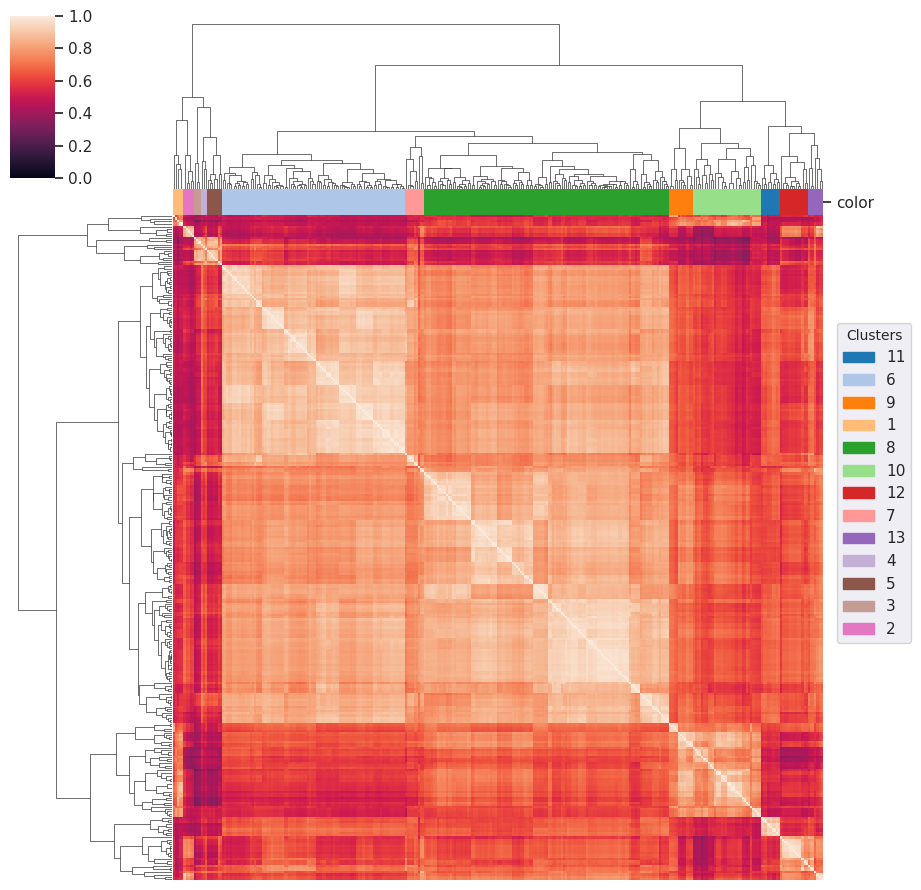

In [9]:
clusters = global_clustering(DF_log_tpm)

Select clusters to remove.

In [10]:
remove_clusters = []
passed_global_corr = clusters[~clusters.isin(remove_clusters)].index

The following code can be adapted to see the NCBI SRA accession for samples in each cluster.

In [11]:
clusters[clusters == 1]

GSM210219    1
GSM210245    1
GSM228979    1
GSM468050    1
GSM556954    1
Name: cluster, dtype: int32

Re-cluster samples to ensure all outliers were removed.

In [12]:
DF_log_tpm_passed_step2 = DF_log_tpm[passed_global_corr]

Number of cluster:  13


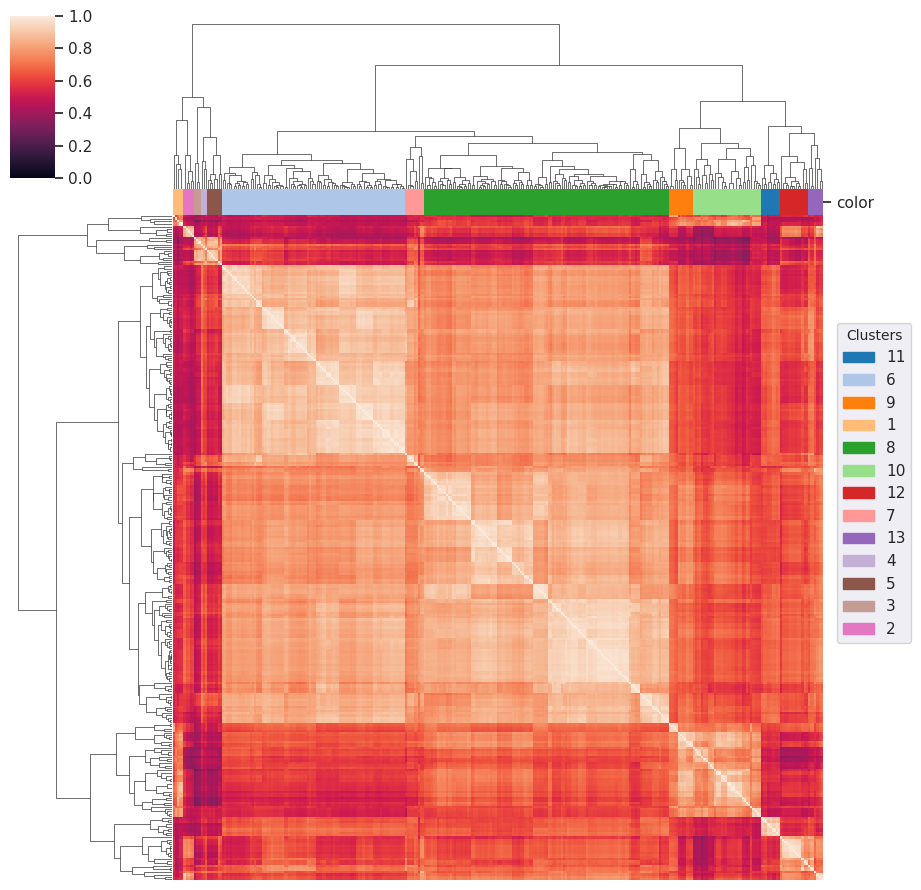

In [13]:
clusters = global_clustering(DF_log_tpm_passed_step2)

Once you are satisfied with your dataset, mark the samples that passed the global correlation

In [14]:
DF_metadata['passed_global_correlation'] = DF_metadata.index.isin(passed_global_corr)

In [15]:
DF_metadata.shape

(305, 48)

# Remove failed samples

In [16]:
qc_columns = ['passed_global_correlation']

In [17]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

# Save current metadata

Enter path of interim metadata files here. It is recommended that the ``metadata_qc.tsv`` file is copied to a new ``metadata_qc_curated.tsv`` file before editing. This will prevent this notebook from over-writing any curated metadata.

In [18]:
metadata_all_qc_file = path.join('..', 'data', 'interim', 'metadata_qc_all.csv') # Enter filename for full metadata QC file
metadata_qc_file = path.join('..', 'data', 'interim', 'metadata_qc.tsv') # Enter filename for metadata QC file with only passing datasets

In [19]:
DF_metadata.to_csv(metadata_all_qc_file)
DF_metadata_passed.to_csv(metadata_qc_file, sep='\t')

# Metadata Curation

The next step is to curate the metadata. At a minimum, three new columns must be added to the metadata sheet:
* ``project``: Nickname for the project. Each bioproject should have a unique project IDs.
* ``condition``: Nickname for the experimental condition. Biological/technical replicates must have identical condition IDs.
* ``reference_condition``: Condition ID of the reference condition. Each project has a single reference condition (See [example metadata sheet](https://github.com/SBRG/nf-rnaseq-bacteria/blob/master/example_data/processed_data/metadata_curated.tsv))

Additional columns may include:
* ``strain_description``: The strain name, and any knock-outs or overexpressed genes
* ``base_media``: Media used (e.g. ``M9``)
* ``carbon_source``: Primary carbon source, with concentration in parentheses (e.g. ``glucose(.4%)``). This is usually empty for undefined media.
* ``nitrogen_source``: Primary nitrogen source, with concentration in parentheses (e.g. ``NH4Cl(1M)``). This is usually empty for undefined media.
* ``aerobicity``: Usually ``aerobic`` or ``anaerobic``
* ``treatment``: Any additional supplements or treatments added to the base media (e.g. ``thiamine(0.1M)`` or ``ampicillin(100ug/mL)``)
* ``temperature``
* ``pH``
* ``OD``: Approximate optical density of cells when selected for library preparation
* ``growth_phase``: e.g. ``mid-exponential`` or ``stationary``
* ``culture_type``: Usually ``batch`` or ``chemostat``
* ``skip``: Whether to skip a sample due to external reasons (e.g. not traditional RNA-seq, distant strain, or lack of metadata)

If specific metadata entries are not reported for a sample, these can be left blank. However, if no metadata can be gleaned from public databases, then we recommend discarding the samples.


### Inputs

In [20]:
metadata_file = path.join('..','data','interim','curated_matadata.csv') # Enter curated metadata filename here

### Load expression data

In [21]:
DF_log_tpm = pd.read_csv(logTPM_file,index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 8214
Number of samples: 305


,GSM94778,GSM94780,GSM94781,GSM94783,GSM94784,GSM94785,GSM94787,GSM94788,GSM94790,GSM212687,...,GSM3747634,GSM3747635,GSM3747636,GSM3747637,GSM5858212,GSM5858213,GSM5858214,GSM5858215,GSM5858216,GSM5858217
GeneID,,,,,,,,,,,,,,,,,,,,,
bll0005,8.846117,8.900867,8.613237,8.872521,8.797337,8.689998,8.520815,7.934281,8.060696,2.765535,...,5.055170,7.087293,3.976620,5.478454,1.168315,2.761417,3.245076,2.612862,4.743693,2.496306
bll0006,10.899281,10.258684,10.834708,10.690696,11.148921,11.164404,9.940607,9.759555,9.373735,4.510962,...,3.827799,5.954929,3.960864,5.486074,1.326261,3.104929,2.975597,6.299840,2.805325,3.100185
bll0007,10.968451,10.317865,10.616457,10.762631,11.086335,10.915655,10.339739,9.942221,9.915730,4.523562,...,5.184871,6.964491,4.554847,5.202171,5.826477,4.844175,4.936713,3.668471,5.643928,3.756351
bll0008,7.049849,7.628628,7.472488,7.561479,7.921841,7.575161,7.443772,7.940167,7.593204,3.405992,...,2.144999,3.996542,4.940298,5.423672,2.590923,3.790282,1.239343,4.486058,2.334871,2.387465
bll0009,9.133142,8.937521,8.553053,9.231461,9.010948,9.010108,8.135966,8.475328,7.745506,4.472488,...,6.149786,3.862947,4.424875,3.588912,1.160720,5.962387,4.573780,5.912207,4.574949,5.629969


### Load metadata

In [22]:
DF_metadata = pd.read_csv(metadata_file,index_col=0)
print('Number of samples with curated metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with curated metadata: 226


,projectID,condition,reference_condition,title,geo_accession,status,submission_date,last_update_date
Unnamed: 0,,,,,,,,
GSM94778,95001,low_iron,low_iron,"Bradyrhizobium japonicum strain LO, low iron, ...",GSM94778,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006
GSM94780,95001,low_iron,low_iron,"Bradyrhizobium japonicum strain LO, low iron, ...",GSM94780,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006
GSM94781,95001,low_iron,low_iron,"Bradyrhizobium japonicum strain LO, low iron, ...",GSM94781,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006
GSM94783,95001,high_iron,low_iron,"Bradyrhizobium japonicum strain LO, high iron,...",GSM94783,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006
GSM94784,95001,high_iron,low_iron,"Bradyrhizobium japonicum strain LO, high iron,...",GSM94784,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006


In [23]:
DF_metadata_passed_step = pd.read_csv(metadata_file,index_col=0)
DF_metadata_passed_step["projectID"] = DF_metadata_passed_step["projectID"].astype(str)

In [24]:
assert(DF_metadata_passed_step.projectID.notnull().all())
assert(DF_metadata_passed_step.condition.notnull().all())

for name,group in DF_metadata_passed_step.groupby('projectID'):
    ref_cond = group.reference_condition.unique()
    
    # Ensure that there is only one reference condition per project
    if not len(ref_cond) == 1:
        print('Multiple reference conditions for:, name')
    
    # Ensure the reference condition is in fact in the project
    ref_cond = ref_cond[0]
    if not ref_cond in group.condition.tolist():
        print('Reference condition not in project:', name)

In [25]:
DF_metadata_passed_step['full_name'] = DF_metadata_passed_step['projectID'].str.cat(DF_metadata_passed_step['condition'],sep=':')

### Remove samples with only one replicate

In [26]:
counts = DF_metadata_passed_step.full_name.value_counts()
keep_samples = counts[counts >= 2].index
print(keep_samples[:5])

Index(['102625:110spc4_micro_PSY', '102625:110spc4_aerobic _PSY',
       '102625:110spc4_anoxic_YEM', '102625:2426_aerobic_PSY',
       '102625:A9_anoxic_YEM'],
      dtype='object')


Only keep these samples

In [27]:
DF_metadata_passed_step = DF_metadata_passed_step[DF_metadata_passed_step.full_name.isin(keep_samples)]
print('New number of samples with curated metadata:',DF_metadata_passed_step.shape[0])
DF_metadata_passed_step.head()

New number of samples with curated metadata: 226


,projectID,condition,reference_condition,title,geo_accession,status,submission_date,last_update_date,full_name
Unnamed: 0,,,,,,,,,
GSM94778,95001,low_iron,low_iron,"Bradyrhizobium japonicum strain LO, low iron, ...",GSM94778,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,95001:low_iron
GSM94780,95001,low_iron,low_iron,"Bradyrhizobium japonicum strain LO, low iron, ...",GSM94780,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,95001:low_iron
GSM94781,95001,low_iron,low_iron,"Bradyrhizobium japonicum strain LO, low iron, ...",GSM94781,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,95001:low_iron
GSM94783,95001,high_iron,low_iron,"Bradyrhizobium japonicum strain LO, high iron,...",GSM94783,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,95001:high_iron
GSM94784,95001,high_iron,low_iron,"Bradyrhizobium japonicum strain LO, high iron,...",GSM94784,Public on Mar 15 2006,Feb 01 2006,Feb 02 2006,95001:high_iron


## Check correlations between replicates

### Remove failed data from log_tpm files

In [28]:
DF_log_tpm = DF_log_tpm[DF_metadata_passed_step.index]

### Compute Pearson R Score

Biological replicates should have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. The correlation threshold can be changed below:

In [29]:
rcutoff = 0.95

The following code computes correlations between all samples and collects correlations between replicates and non-replicates.

In [30]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed_step)*(len(DF_metadata_passed_step)-1)/2

for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed_step.index,2),total=num_comparisons):
    if DF_metadata_passed_step.loc[exp1,'full_name'] == DF_metadata_passed_step.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

  0%|          | 0/25425.0 [00:00<?, ?it/s]

Correlations can be plotted on a histogram

Median Pearson R between replicates: 0.96


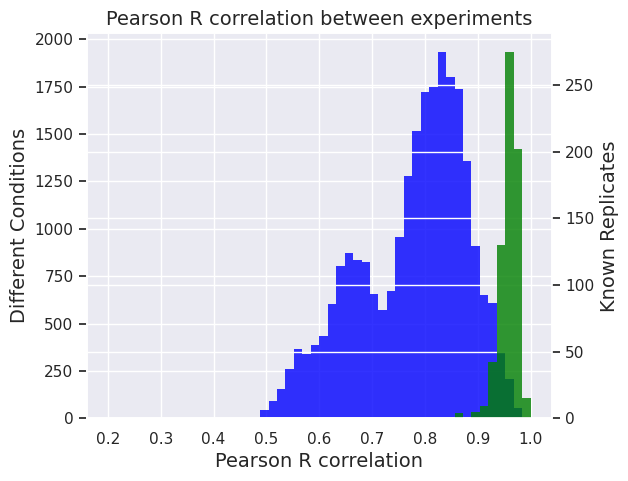

In [31]:
fig,ax = plt.subplots(figsize=(6,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)
plt.savefig(path.join('..','figures',"Histogram_of_data_quality.jpg"),dpi=600)
plt.savefig(path.join('..','figures',"Histogram_of_data_quality.pdf"))
med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

Remove samples without any high-correlation replicates

In [32]:
dissimilar = []
for idx, grp in DF_metadata_passed_step.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)

# Save this information in both the original metadata dataframe and the new metadata dataframe
DF_metadata_passed_step['passed_replicate_correlations'] = ~DF_metadata_passed_step.index.isin(dissimilar)

In [33]:
DF_metadata_final = DF_metadata_passed_step[DF_metadata_passed_step['passed_replicate_correlations']]
print('# Samples that passed replicate correlations:',len(DF_metadata_final))

# Samples that passed replicate correlations: 226


In [34]:
project_exprs = []
for name,group in DF_metadata_final.groupby('projectID'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Ensure the reference condition is still in the project
    if ref_cond not in group.condition.tolist():
        print('Reference condition missing from:', name)
    
    # Check that each project has at least two conditions (a reference and at least one test condition)
    if len(group.condition.unique()) <= 1:
        print('Only one condition in:', name)

## Normalize dataset to reference conditions

In [35]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [36]:
project_exprs = []
for name,group in DF_metadata_final.groupby('projectID'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Get reference condition sample ids
    ref_samples = group[group.condition == ref_cond].index
    
    # Get reference condition expression
    ref_expr = DF_log_tpm_final[ref_samples].mean(axis=1)
    
    # Subtract reference expression from project
    project_exprs.append(DF_log_tpm_final[group.index].sub(ref_expr,axis=0))

DF_log_tpm_norm = pd.concat(project_exprs,axis=1)

## Save final datasets

In [37]:
logTPM_qc_file = path.join('..','data','processed_data','logexpset_qc.csv')
logTPM_norm_file = path.join('..','data','processed_data','logexpset_qc_norm.csv')
final_metadata_file = path.join('..','data','processed_data','final_metadata_file.tsv') 
final_metadata_all_file = path.join('..','data','interim','final_metadata_all_file.tsv')

DF_log_tpm_final.to_csv(logTPM_qc_file)
DF_log_tpm_norm.to_csv(logTPM_norm_file)
DF_metadata_final.to_csv(final_metadata_file, sep='\t')